***
# EDA emotions_with_neutrals_220228.csv dataset
Concatenated the neutrals from Kaggle dataset with Huggingface dataset<br>
https://github.com/dair-ai/emotion_dataset<br>
https://huggingface.co/datasets/dair-ai/emotion
***

***
## 1 Load the dataset
 <span style="color:red">!!!Make sure to comment out the correct source (Google drive or local)!!!</span>

In [1]:
import pandas as pd
import numpy as np
import random

# read from the google drive
# url = 'https://drive.google.com/file/d/1e-w7djzvn1LUFutmDgnOh16mYjiVX34s/view?usp=sharing'
# source = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

# read from local
source = '../datasets/emotions_with_neutrals_220228.csv'

# Load the pickled DataFrame
df = pd.read_csv(source)

print(df.head())

   Unnamed: 0                                               text emotions
0       27383  i feel awful about it too because it s my job ...  sadness
1      110083                              im alone i feel awful  sadness
2      140764  ive probably mentioned this before but i reall...      joy
3      100071           i was feeling a little low few days back  sadness
4        2837  i beleive that i am much more sensitive to oth...     love


***
## 2 Basic EDA

### Datatypes for each of the columns in our dataframe

In [2]:
print(df.dtypes)

Unnamed: 0     int64
text          object
emotions      object
dtype: object


### Rename the columns to match the other data to make it easier to reuse code

In [3]:
# Rename columns using rename() method
df.rename(columns={'text': 'content', 'emotions': 'sentiment'}, inplace=True)
print(df.dtypes)

Unnamed: 0     int64
content       object
sentiment     object
dtype: object


### Unique types and count of sentiments in the dataset

In [4]:
# get the value counts of each unique value
counts = df['sentiment'].value_counts()

# convert the counts to percentages
percentages = counts / counts.sum() * 100

cp_df = pd.DataFrame({'count': counts, 'percentage': percentages})

print(cp_df)

           count  percentage
joy       141067   33.157362
sadness   121187   28.484629
anger      57317   13.472183
fear       47712   11.214558
love       34554    8.121811
surprise   14972    3.519122
neutral     8638    2.030335


### Max and min lengths of words in the text

In [44]:
import statistics

# Apply the lambda function to the 'content' column and list called word_count_list'
word_count_list = list(df['content'].apply(lambda x: len(x.split(' '))))

# display the maximum and minimum lengths
print('Maximum word length:', max(word_count_list))
print('Minimum word length:', min(word_count_list))
print('Mean word length:', statistics.mean(word_count_list))
print('Median word length:', statistics.median(word_count_list))
print('75th percentile word length:', np.percentile(word_count_list, 75))
print('85th percentile word length:', np.percentile(word_count_list, 85))
print('95th percentile word length:', np.percentile(word_count_list, 95))

Maximum word length: 178
Minimum word length: 1
Mean word length: 19.058693562300355
Median word length: 17
75th percentile word length: 25.0
85th percentile word length: 30.0
95th percentile word length: 41.0


(array([2.0860e+03, 2.1312e+04, 3.1886e+04, 3.3226e+04, 3.4129e+04,
        3.4441e+04, 3.3288e+04, 3.1458e+04, 2.9109e+04, 2.6666e+04,
        2.3666e+04, 2.0754e+04, 2.5957e+04, 1.3887e+04, 1.1442e+04,
        9.7050e+03, 8.0990e+03, 6.6180e+03, 5.5650e+03, 4.6280e+03,
        3.7870e+03, 3.1830e+03, 2.5530e+03, 2.1370e+03, 2.5210e+03,
        1.2620e+03, 8.8100e+02, 5.4200e+02, 3.4200e+02, 1.7100e+02,
        7.4000e+01, 3.3000e+01, 1.8000e+01, 3.0000e+00, 2.0000e+00,
        4.0000e+00, 3.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

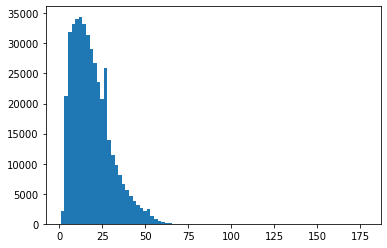

In [36]:
import matplotlib.pyplot as plt

plt.hist(word_count_list, bins=len(set(lengths)))

#### Initial thoughts on this dataset

This dataset, while a bit imbalanced, isn't as imbalanced as the Kaggle dataset that we had looked at initially. Additionally, unlike the Tweet dataset, we have content that is up to 830 characters.

***
## 3 Check each sentiment to see what type of content there is to see if it's legit

### All the sentiments

In [45]:
all_sentiments = sorted(df['sentiment'].unique())
print(all_sentiments)

['anger', 'fear', 'joy', 'love', 'neutral', 'sadness', 'surprise']


### A function to explore the sentiments

In [46]:
# pass the emotion and number of random text to see
def explore(emotion=None, num_tweets=5):
    if emotion == None:
        return 'no emotion provided'
    elif emotion not in all_sentiments:
        return 'not one of the sentiments in the dataframe'
    else:
        content = df.loc[df['sentiment'] == emotion, 'content']

        random_nums = random.sample(range(len(content)), num_tweets)
        
        print(f"Number of tweets for '{emotion}': {len(content)}")
        print(f"Percentage of the dataset: {cp_df.loc[emotion].percentage}")
        print(f"Random indices: {random_nums}", end='\n\n')
        print(f"Random {num_tweets} Tweets for emotion '{emotion}':")

        counter = 1
        for tweet in content.iloc[random_nums]:
            print(f"{counter}: {tweet}", end='\n')
            counter = counter + 1

### Uncomment to see all sentiments at once

In [8]:
# this cell prints all of the sentiments all at once,
# but keeping it commented out for now

# for emotion in all_sentiments:
#     explore(emotion)
#     print('**********************************************************\n**********************************************************\n')

### Let's explore 'anger'

In [9]:
explore('anger')

Number of tweets for 'anger': 57317
Percentage of the dataset: 13.751382527728529
Random indices: [13314, 39770, 43293, 22191, 26200]

Random 5 Tweets for emotion 'anger':
1: im really feeling very impatient
2: i feel frustration because i cant see beyond petty desires
3: i shouldnt feel so angry
4: i feel ya on the rude people thing and what are you wearing thing
5: i used to feel so jealous of amanda


#### Initial thoughts on 'anger':

The number of 'anger' text, is 57317, is the third highest amount in this dataset and represents 13.75% of the dataset.<br>
<br>
Most of these texts feel very spot-on with the label 'anger' (e.g. "i left feeling really quite angry and frustrated", "i feel disgusted and frustrated", "i am now well aware of his intention and feeling insulted").<br>
<br>
There are some that may not fit exactly 'anger' (e.g. "i want to be honest and blunt and tell it like it is and not worry that i might hurt someones feelings or make them make mad me", "i feel gleefully rebellious", "i find the easiest way to calm down if im feeling agitated is by satisfying each of the five senses") but can reasonably assessed as such.<br>
<br>
In general, though, after looking through several random batches of these, amounting to several hundred short texts, it seems that the 'anger' label is fitting.

### Let's explore 'fear'

In [10]:
explore('fear')

Number of tweets for 'fear': 47712
Percentage of the dataset: 11.446969715145308
Random indices: [44797, 35331, 33709, 32952, 46468]

Random 5 Tweets for emotion 'fear':
1: i took a couple deep breaths before the feel of his lips of my neck startled me
2: one night i was lying in my bed awake but i had my eyes closed i saw figures with terrible faces and black frocks bending over me and touching me i opened my eyes but i could still see them i had the feeling that somebody was in the room it was terrible only when i turned on the light i was able to go to sleep
3: i was is constantly feeling restless and asked if we could walk around for a bit
4: i feel like ive been tortured in my sleep lately and im not quite sure why
5: i have gone from feeling apprehensive to feeling strong within hours


#### Initial thoughts on 'fear':

Like 'anger', these texts seem to be in line with their labeled emotion ('fear').

### Let's explore 'joy'

In [11]:
explore('joy')

Number of tweets for 'joy': 141067
Percentage of the dataset: 33.84451871240784
Random indices: [134418, 91432, 104653, 37242, 8904]

Random 5 Tweets for emotion 'joy':
1: i am feeling energetic
2: i want people to believe that you can feel as delighted to see your spouse after being married for days which will be how many days my parents have been married come december th as you did while you were dating
3: i that is the conscious me would interpret these actions as meaning that everything was okay and i following my body s lead would feel calm
4: i feel delighted when i think of it
5: i can laugh at quite a bit of it now and feel ok about some of it but that was only after deciding that i had to not let it get to me and sort the shit out


#### Initial thoughts on 'joy'

The 'joy' label seems to be a mixed bag. There are some that seem to fit the label (e.g. "i feel good about the way im going to look that day", "i never feel so bouncy and happy like this since i was kid") while others definitely do not fit (e.g. "i didnt really feel satisfied with the solution", "i feel no less pain feel no less resolved in my head about why").

### Let's explore 'love'

In [12]:
explore('love')

Number of tweets for 'love': 34554
Percentage of the dataset: 8.29012809224369
Random indices: [17334, 23894, 29975, 29405, 25024]

Random 5 Tweets for emotion 'love':
1: i look at her face i feel a loss of interest in all females and anyone for romantic intimacy
2: i turned her in his arms her hair slowly ask mo and my heart quite some mixed feelings i no longer own also belongs to these lovely like flowers girl sometimes i did really hurt their heart but i was always unable to manage their own
3: i still feel that way dwelling in the shelter of tender memories and deep rooted affection
4: i feel like i should be a citizen of iran for caring as much as i do
5: i like the line theyre toeing with michael fiona right now where they both know they still have feelings for each other and theyre at a place where theyre being a little more affectionate with each other than they have been in the past but theyre not really together either


#### Initial thoughts on 'love':

Same as 'joy'. Labeling is a mixed bag.

### Let's explore 'sadness'

In [13]:
explore('sadness')

Number of tweets for 'sadness': 121187
Percentage of the dataset: 29.07494799776396
Random indices: [116704, 23708, 14941, 61977, 83478]

Random 5 Tweets for emotion 'sadness':
1: i feel like i am just going to fill your screen with a bunch of useless information because lets face it i do spend the majority of my week at work
2: i started thinking about all the times that people were jerks and there was nothing really that i could do except go home write unsatisfying angry complaints into the internetsphere and generally feel helpless marginalized and disregarded by society
3: i used to feel infinitely needy and insecure around any woman who i really wanted
4: i feel he should have been punished
5: i have read many of these posts and it makes me feel dumb to say that i m feeling like this


#### Initial thoughts on 'sadness':

More of these feel like texts along the lines of 'sadness' than do 'love' and 'joy'; however, there are some that also seem mislabeled, though not as many proportionally. This is among the largest cohort in the dataset.

### Let's explore 'surprise'

In [14]:
explore('surprise')

Number of tweets for 'surprise': 14972
Percentage of the dataset: 3.5920529547106708
Random indices: [3788, 7820, 13723, 8241, 8371]

Random 5 Tweets for emotion 'surprise':
1: i visit nepenthe its like i feel some connection with him i dont know its funny but i do
2: i feel surprised by how much i get from my family and friends from all around the world which can make me feel like a phoney because they seem to have more faith in me than i have
3: i feel love funny videos fun jokes videos humor comedy videos free lotto extraterrestrial aliens link rel stylesheet type text css href http megalegit
4: im really excited about it but im also feeling a bit overwhelmed by the internet lately
5: i feel like i just had myself a dazed and confused moment there for a minute


#### Initial thoughts on 'surprise':

Comments same as 'sadness'.

### General thoughts about the contents of these tweets:

This data appears to have been pre-processed: no apostrophes (replaced with whitespace), no numerical digits, all lowercase, and punctuation removed.<br>
<br>
In general this data seems to be more or less on target with the labels. There are some, of course, that may seem out of place for the label in question, but generally speaking the labels within each cohort seem to be on track.

***
## 4 Work with the data

### Padding and truncating the sequences to make sure that the shape is the same for each string.

In [ ]:
def get_sequences(tokenizer, tweets):
  sequences = tokenizer.texts_to_sequences(tweets)
  padded = pad_sequences(sequences, truncating='post', padding='post', maxlen=maxlen) # truncating happens at the end of the sequence (post)
  return padded # all examples will be the returned with same input size